In [195]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3

import matplotlib # ; matplotlib.use('nbagg')

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

if 0:
    df1 = pd.read_csv('projects.csv')
    printt(df1)

In [196]:
%matplotlib inline

In [197]:
conn = sqlite3.connect("./projects.db")
cur = conn.cursor()
cur.execute('select count(*) from projects'); print(cur.fetchall())

[(3158,)]


In [198]:
cur.execute('select * from projects order by num_dirs desc limit 1'); print(cur.fetchall())

[('perl5', '2013-01-20', 'v5.17.8', '997', '5757')]


In [199]:
# how many releases were made this year

In [200]:
df = pd.read_sql_query('select * from projects order by date desc limit 1', conn); df.head()

,project,date,tag,num_dirs,num_files
0,gcc,2020-05-07,releases/gcc-10.1.0,4895,100233


In [201]:
cur.execute('select count(*) from projects where date > "2020"'); print(cur.fetchall())

[(25,)]


In [202]:
cur.execute('select distinct(project) from projects where date > "2020"'); print(cur.fetchall())

[('dhcp',), ('dnsmasq',), ('flask',), ('gcc',), ('glibc',), ('openssh-portable',), ('perl5',)]


In [203]:
# NP plot demo
if 0:
    # Prepare the data
    x = np.linspace(0, 10, 100)

    plt.figure(figsize=(10,10))

    # Plot the data
    plt.plot(x, x, label='linear')

    # Add a legend
    plt.legend()
    # Show the plot
    plt.show()

In [204]:
df.index.values

array([0])

In [227]:
query = """select
    date(date, 'start of year') as year,
    count(*) as c
from projects
where date >= '2000-01-01'
   
group by 1
 """
df = pd.read_sql_query(query, conn)
if 0:
    df.head()
elif 0:
    fix, ax = plt.subplots(figsize=(12,12))
    ax.bar(df.index.values, df.c)
    plt.show()


  month   c
0    01   2
1    02   2
2    03   1
3    05   1
4    07   3
5    08   2
6    09   2
7    10   2
8    11   5
9    12  10


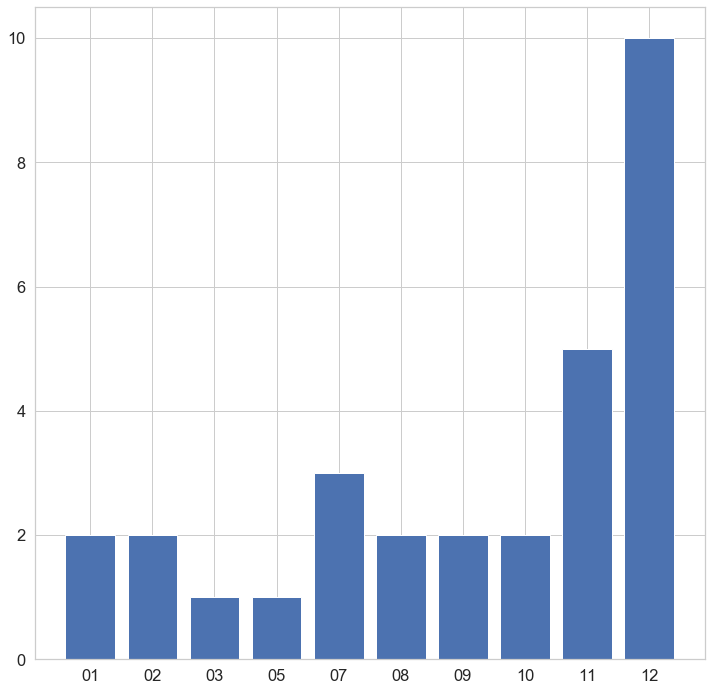

In [274]:
# df = pd.read_sql_query("select count(*) from projects where project='bash'", conn); df.head()

query = """
SELECT
    strftime('%m', date(date, 'start of month')) as month,
    count(*) as c
FROM projects
WHERE project = 'bash'
GROUP BY month
 """

df = pd.read_sql_query(query, conn)
if 1:
    # print(df.head())
    print(df)
if 1:
    fix, ax = plt.subplots(figsize=(12,12))
    ax.bar(df.month, df.c)
    plt.show()


In [256]:
_


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])